In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("creditcard.csv")
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.shape

(85259, 31)

In [ ]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(17052, 31)


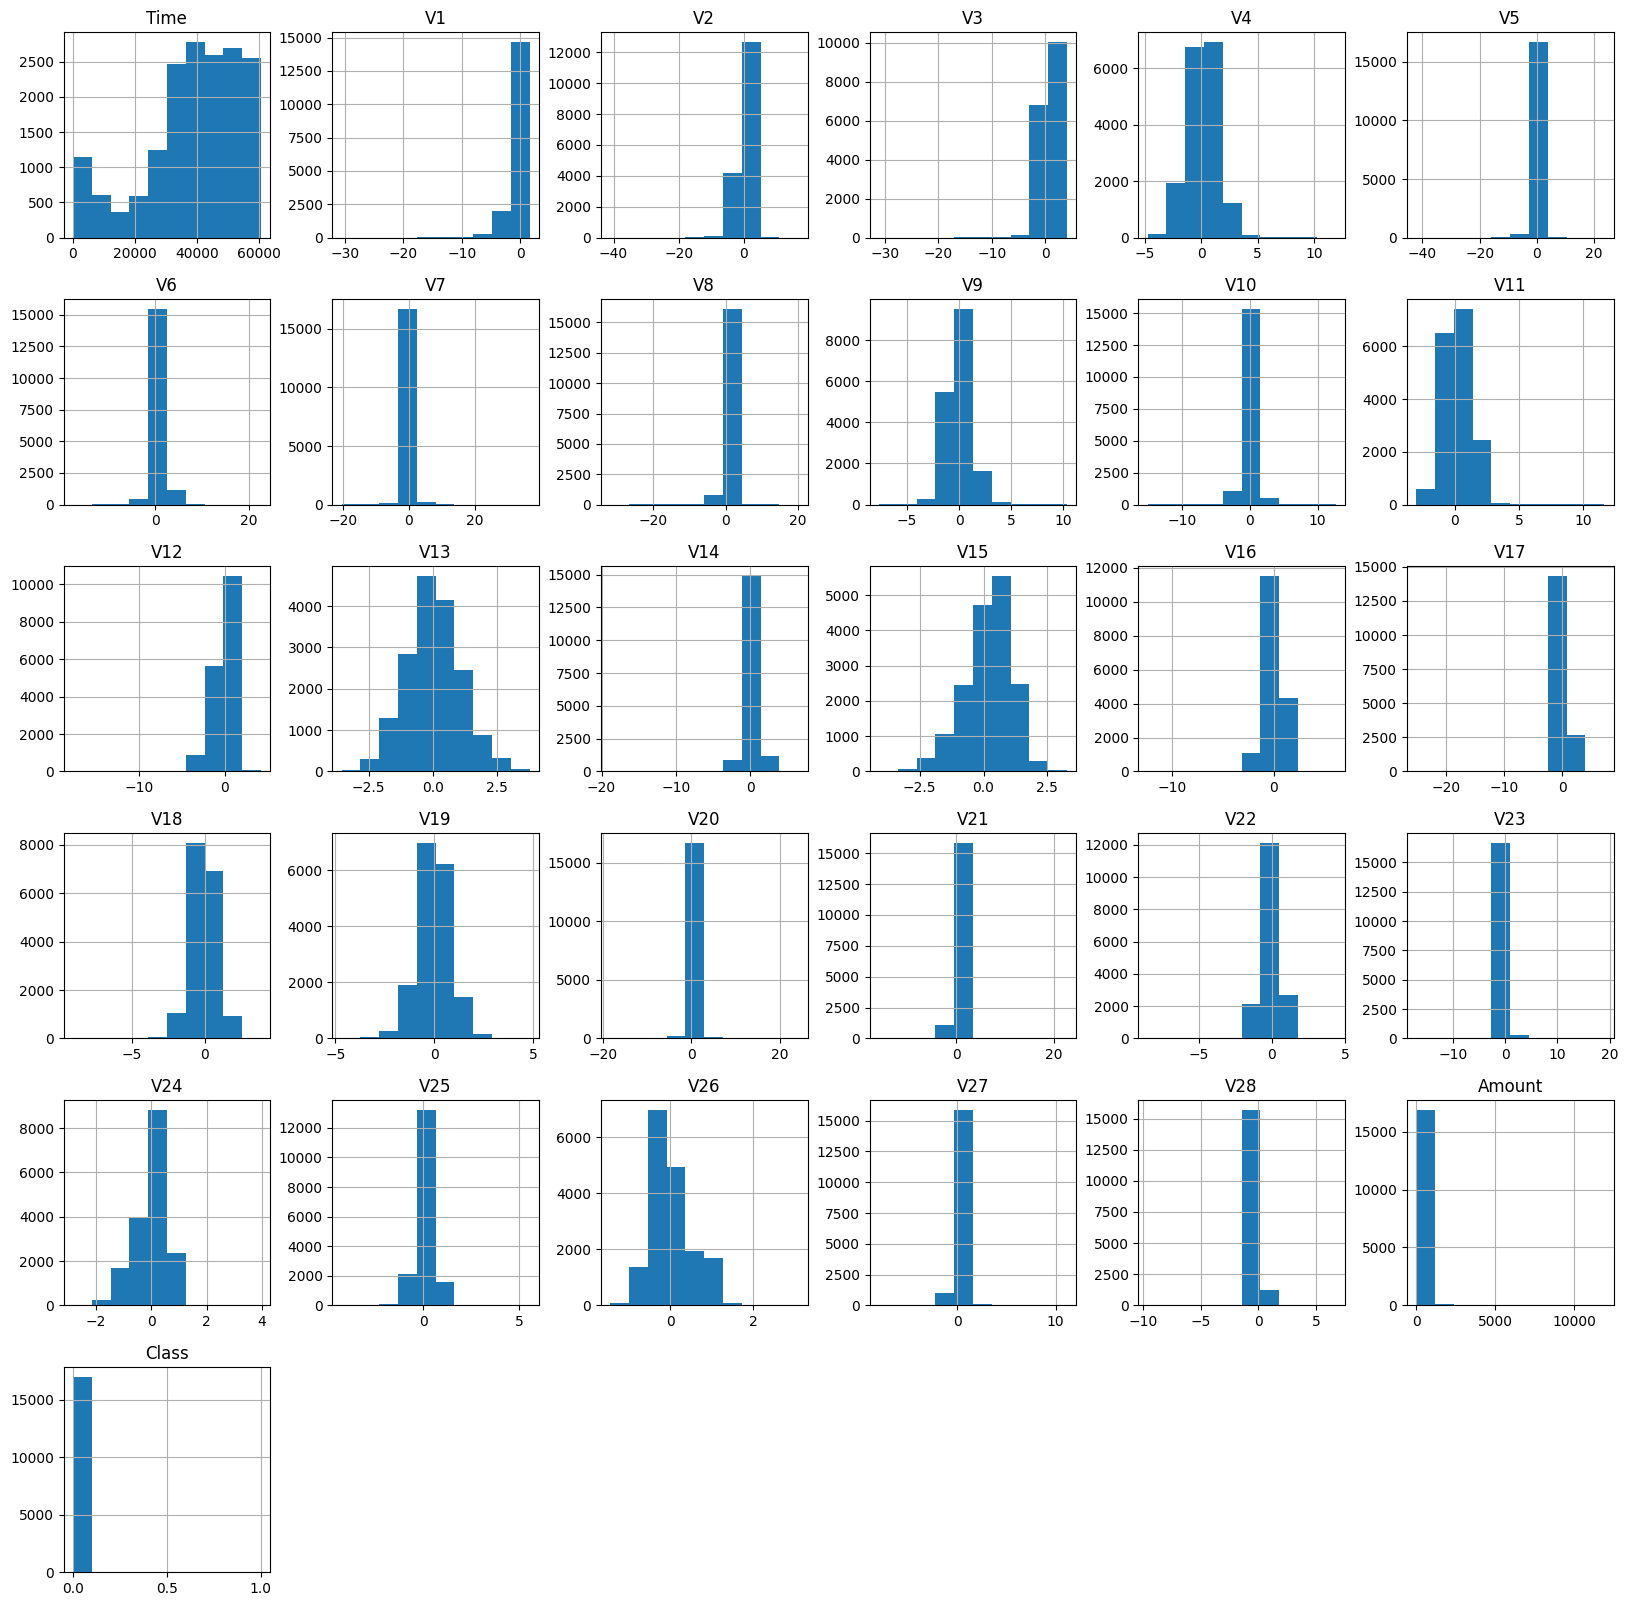

In [ ]:
data.hist(figsize=(20,20))
plt.show()

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_frac = len(fraud)/float(len(valid))
print("outliar frac: ", outlier_frac)

print("Number of fraud transactions: ", len(fraud))
print("Number of valid transactions: ", len(valid))

outliar frac:  0.0022923646623170518
Number of fraud transactions:  39
Number of valid transactions:  17013


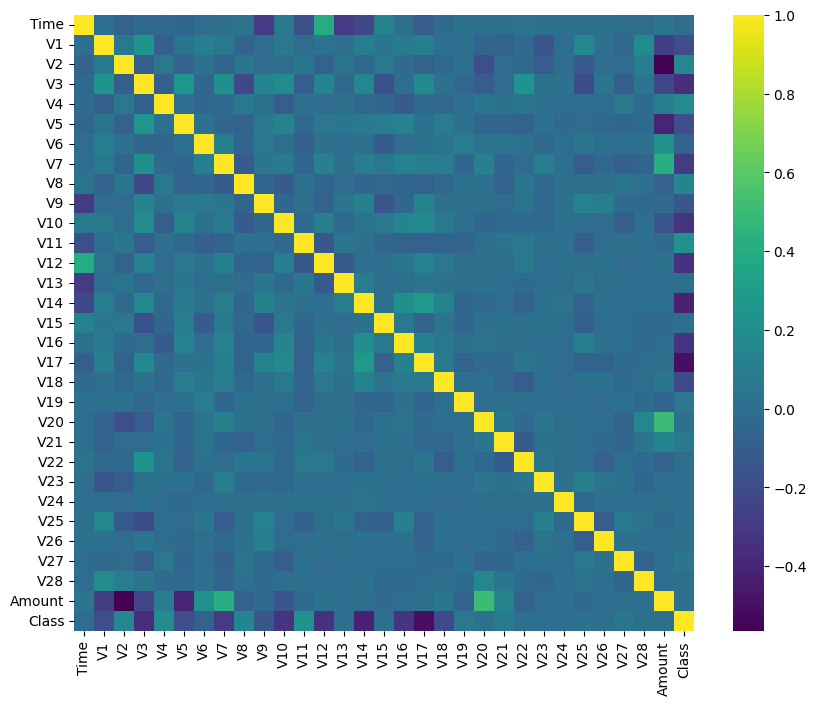

In [ ]:
corr = data.corr()
fig = plt.figure(figsize=(10,8))

sns.heatmap(corr, cmap='viridis')
plt.show()

In [ ]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ["Class"]]

# store the variable we will be predicting on which is class
target = "Class"

# X includes everything except our class column
X = data[columns]

# y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(17052, 30)
(17052,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_frac,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_frac)
}

In [ ]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()

    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 41
0.997595589960122
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17013
         1.0       0.47      0.49      0.48        39

    accuracy                           1.00     17052
   macro avg       0.74      0.74      0.74     17052
weighted avg       1.00      1.00      1.00     17052

Local Outlier Factor: 77
0.9954844006568144
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17013
         1.0       0.03      0.03      0.03        39

    accuracy                           1.00     17052
   macro avg       0.51      0.51      0.51     17052
weighted avg       1.00      1.00      1.00     17052



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = data[columns]
y = data[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=100)
model = SVC()

model.fit(train_X, train_y)

prediction = model.predict(test_X)

In [ ]:
print(confusion_matrix(test_y, prediction))
print(classification_report(test_y, prediction))
print('\n')
print(accuracy_score(test_y, prediction))

[[6808    0]
 [  13    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6808
         1.0       0.00      0.00      0.00        13

    accuracy                           1.00      6821
   macro avg       0.50      0.50      0.50      6821
weighted avg       1.00      1.00      1.00      6821



0.9980941210966134


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
